<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana3/Notebooks/2%20Teorema_del_limite_central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El *teorema del límite central* establece que la **distribución de la suma** de un número grande* de ***variables iid*** será aproximadamene **normal**, sin importar la distribución subyacente


## Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import random
import operator
import re # módulo operaciones expresiones regulares
import unicodedata  #para quitar tildes
from collections import Counter
from scipy.stats import norm

import matplotlib.pyplot as plt
import seaborn as sns

## Funciones

In [2]:
def errores_alturas(n, m = 500):
    '''
    n = tamaño de cada muestra
    m = cuántas muestras

    '''
    mu, sigma = 1675, 62.8     # dimensiones en milimetros

    muestras = {'muestra '+ str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
    alturas_hombres = pd.DataFrame.from_dict(muestras)
    sns.distplot(mu - alturas_hombres.mean(), fit=norm, kde=False, bins=50)
    plt.show()



In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [4]:
def borrar_elementos(texto, lista):
  '''Función para eliminar en un texto los elementos contenidos en una lista,
  por ejemplo:   autor, titulo y otros elementos'''

  for elemento in lista:
    texto = texto.replace(elemento, "")
  return texto

In [5]:

def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''

  #Convertir en mínusculas
  texto_limpio = texto.lower()

  #Quitar puntuación
  puntuacion = [".", "," , "-", "\n", ":", ";",'"', "'", "  ",
                "!", "¡", "¿", "?", "(", ")", "<", "«", "»", "~",]
  for p in puntuacion:
    texto_limpio = texto_limpio.replace(p,"")

  #Quitar numeros

  texto_limpio = "".join(filter(lambda x: not x.isdigit(), texto_limpio))

  #Quitar tildes

  texto_limpio =''.join((c for c in unicodedata.normalize('NFD',texto_limpio) if
                         unicodedata.category(c) != 'Mn'))

  return texto_limpio

In [6]:

def genera_texto_nletras(texto, n=1, tot_letras = 100):
  '''Devuelve un texto, utilizando ngramas a partir de letras
  n es la cantidad de letras que se toman en consideración para
  generar la siguiente'''
  ngramas = {}
  for i in range(len(texto) - n):
    seq = texto[i:i+n]
    if seq not in ngramas.keys():
      ngramas[seq] = []
    ngramas[seq].append(texto[i+n])

  ngrama = np.random.choice(list(ngramas.keys()))
  nuevo_texto = ngrama

  for i in range(tot_letras):
    if ngrama not in ngramas.keys():
      break
    siguiente_letra = np.random.choice(ngramas[ngrama])
    nuevo_texto += siguiente_letra
    ngrama = nuevo_texto[len(nuevo_texto)-n:len(nuevo_texto)]
  return nuevo_texto

In [7]:
def genera_muestras_de_texto(texto, grado=0,
                             num_muestras=100,
                             tam_muestra=200 ):
  muestras={}
  for i in range(num_muestras):
    if grado == 0:
      muestras[i]= "".join(random.sample(texto, tam_muestra))
    else:
      muestras[i] = genera_texto_nletras(texto, grado, tam_muestra)
  return pd.Series(muestras, name= 'muestra' )

In [8]:
def cuenta_vocales(texto):
  vocales ='aeiou'
  tot_vocales= 0
  for caracter in texto:
    if caracter in vocales:
      tot_vocales += 1
  return tot_vocales

In [9]:
def cuenta_caracteres_antes_de_n(texto):
  caracteres_antes = 0
  for caracter in texto:
    if caracter == 'n':
      break
    caracteres_antes += 1

  return caracteres_antes

# Distribución gaussiana (altura de hombres adultos)

a partir de la [distribución de la altura de trabajadores industriales de sexo masculino en Guadalajara](https://www.researchgate.net/publication/31722433_Dimensiones_antropometricas_de_la_poblacion_latinoamericana_Mexico_Cuba_Colombia_Chile_R_Avila_Chaurand_LR_Prado_Leon_EL_Gonzalez_Munoz)

In [38]:
mu, sigma = 1675, 62.8     # dimensiones en milimetros

n = 500 # tamaño de la muestra
m = 2000 # número de muestras
muestras = {'muestra '+str(i): np.random.normal(mu, sigma,n) for i in range(1, m+1)}
alturas_hombres = pd.DataFrame.from_dict(muestras)
alturas_hombres

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,1801.301854,1657.467780,1518.337326,1625.537024,1739.300864,1623.972371,1707.161743,1617.120738,1658.611499,1742.071674,...,1725.257889,1694.115898,1693.749947,1683.668674,1717.603917,1595.144960,1671.567411,1607.323442,1715.108443,1752.060761
1,1624.530400,1689.728190,1649.839944,1659.018252,1709.150632,1807.790726,1530.413857,1740.277783,1780.700102,1682.530725,...,1716.679611,1656.368988,1581.513058,1708.310785,1548.428545,1590.587406,1757.907584,1721.133816,1834.631917,1623.974902
2,1650.031573,1704.760370,1780.963447,1638.676453,1656.962865,1655.500202,1650.396236,1748.786327,1618.839921,1644.297773,...,1725.376856,1653.030065,1672.467089,1643.311458,1819.993782,1669.349781,1511.304955,1655.977444,1625.951857,1699.796015
3,1719.048002,1652.520555,1615.001941,1636.100558,1713.684928,1623.235262,1713.851750,1725.764452,1641.860404,1580.152249,...,1790.112363,1698.038843,1641.288065,1675.598528,1730.269250,1737.663260,1654.438404,1713.828883,1634.680460,1635.450817
4,1661.316641,1709.093184,1573.628596,1673.478341,1556.425944,1594.783749,1722.671438,1641.795459,1638.623556,1734.389429,...,1777.974878,1632.117522,1600.571946,1601.875943,1536.941823,1749.318944,1677.810274,1714.317622,1753.510258,1704.139082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1586.272824,1649.827879,1611.120179,1679.026950,1713.474248,1702.224919,1570.194552,1620.973457,1530.250257,1763.045658,...,1667.714121,1776.988765,1636.918282,1734.771111,1764.201428,1709.371868,1643.170541,1614.015473,1675.707220,1767.224274
496,1699.660809,1671.372674,1740.257652,1644.170974,1672.058332,1836.110345,1688.734199,1741.120936,1806.553654,1701.015618,...,1606.668653,1709.568511,1666.395745,1769.171991,1565.494929,1733.826902,1690.960371,1514.902901,1656.791541,1704.689990
497,1656.198629,1820.767504,1640.709464,1748.604264,1695.936048,1713.062355,1665.393879,1584.011785,1731.458777,1647.031468,...,1712.788090,1635.680310,1672.331842,1783.728582,1740.595905,1639.935853,1620.514290,1642.615641,1719.560871,1726.783453
498,1715.055225,1645.332689,1620.380557,1717.252674,1607.321821,1664.943593,1678.931412,1726.830573,1810.475641,1843.466089,...,1609.860492,1664.406653,1580.805144,1617.100297,1771.290299,1601.397761,1638.279280,1706.235402,1727.562519,1707.121692


<h2> Distribución de cada muestra

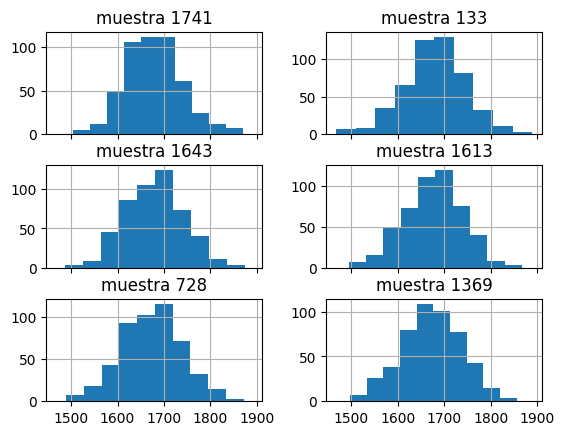

In [39]:
alturas_hombres.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2> Distribución de la suma

In [40]:
suma = alturas_hombres.sum()
suma

,0
muestra 1,837026.902923
muestra 2,838082.487536
muestra 3,836554.006879
muestra 4,837683.398308
muestra 5,836032.867460
...,...
muestra 1996,838051.091977
muestra 1997,837605.705175
muestra 1998,838368.228444
muestra 1999,834401.837182


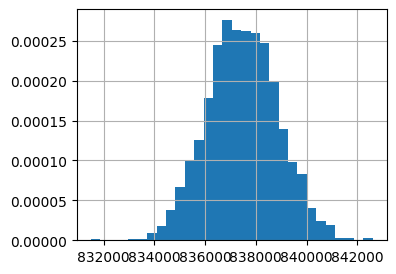

In [41]:
suma.hist(bins=30, figsize=(4,3), density=True)
plt.show()

<h2> Distribución de los promedios

In [42]:
medias = alturas_hombres.mean()
medias

,0
muestra 1,1674.053806
muestra 2,1676.164975
muestra 3,1673.108014
muestra 4,1675.366797
muestra 5,1672.065735
...,...
muestra 1996,1676.102184
muestra 1997,1675.211410
muestra 1998,1676.736457
muestra 1999,1668.803674


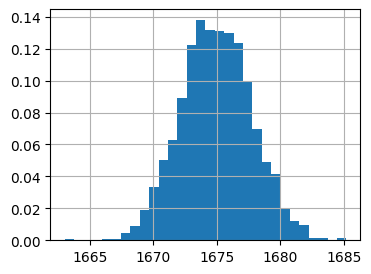

In [43]:
medias.hist(bins=30, figsize=(4,3), density=True)
plt.show()

<h2> Distribución de los errores

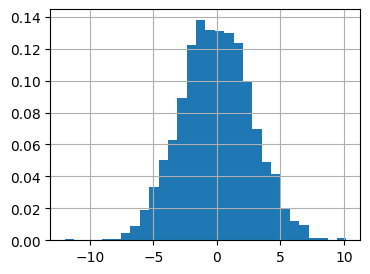

In [44]:


errores = medias-mu
errores.hist(bins=30, figsize=(4,3), density=True) # Use density=True to normalize the histogram
plt.show()

$$Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$


Media de los Puntajes Z: -0.0176 (debería ser cercano a 0)
Desviación Estándar de los Puntajes Z: 0.9906 (debería ser cercano a 1)


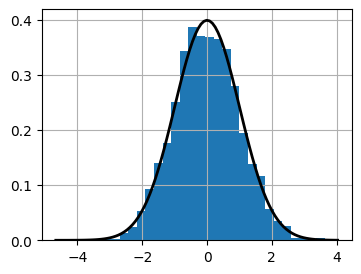

In [50]:
# podemos llegar a la distribución normal estándar

z  = (medias-mu)/(sigma/np.sqrt(n))
z.hist(bins=30, figsize=(4,3), density=True)

media_z, std_z = z.mean(), z.std()

print(f"\nMedia de los Puntajes Z: {media_z:.4f} (debería ser cercano a 0)")
print(f"Desviación Estándar de los Puntajes Z: {std_z:.4f} (debería ser cercano a 1)")


# Distribucción gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.show()
plt.show()

# Distribución Bernoulli (Agujas de Buffon)

<h2> Obtener muestras

In [52]:
def cruce_agujas_Buffon(n):
    l = 1
    l_cuadrado = 10

    x = np.random.uniform(0, l_cuadrado, n) # coordenada x del centro de la aguja
    y = np.random.uniform(0, l_cuadrado, n) # cordenada y del centro del aguja
    𝜃 = np.random.uniform(0, np.pi, n) # angulo de rotación de la aguja en radianes, entre 0 y pi (180 grados)

    # Calcula coordenadas extremos (P1 y P2)
    x1 = x - (1/2 * np.cos(𝜃))
    y1 = y - (1/2 * np.sin(𝜃))

    x2 = x + (1/2 * np.cos(𝜃))
    y2 = y + (1/2 * np.sin(𝜃))

    # ¿Cruza alguna de las lineas del tapete?
    cruza = np.where(np.floor(y1) != np.floor(y2), 1, 0)    # np.floor(3.76) = 3

    return cruza

In [53]:
n = 3408 # tamaño de la muestra
m = 2000 # número de muestras
Buffon_df= pd.DataFrame.from_dict({'experimento '+str(i): cruce_agujas_Buffon(n) for i in range(1, m+1)})
Buffon_df

,experimento 1,experimento 2,experimento 3,experimento 4,experimento 5,experimento 6,experimento 7,experimento 8,experimento 9,experimento 10,...,experimento 1991,experimento 1992,experimento 1993,experimento 1994,experimento 1995,experimento 1996,experimento 1997,experimento 1998,experimento 1999,experimento 2000
0,0,1,1,1,0,1,1,0,0,0,...,0,1,1,1,1,1,0,0,1,1
1,0,1,1,1,0,0,0,1,0,1,...,1,1,0,1,1,0,0,1,0,0
2,1,1,1,0,0,0,0,0,1,0,...,1,0,0,1,1,1,1,1,0,1
3,0,1,0,1,1,0,0,1,0,0,...,1,1,0,1,1,1,1,1,1,1
4,1,1,1,1,1,0,0,1,0,1,...,1,1,1,0,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3403,1,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,0,1,0,1
3404,0,0,1,0,1,1,0,1,1,1,...,1,0,1,1,1,0,1,1,0,1
3405,1,1,1,1,1,0,1,1,0,1,...,0,1,1,1,1,0,1,1,0,1
3406,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,0


<h2> Distribución de cada muestra

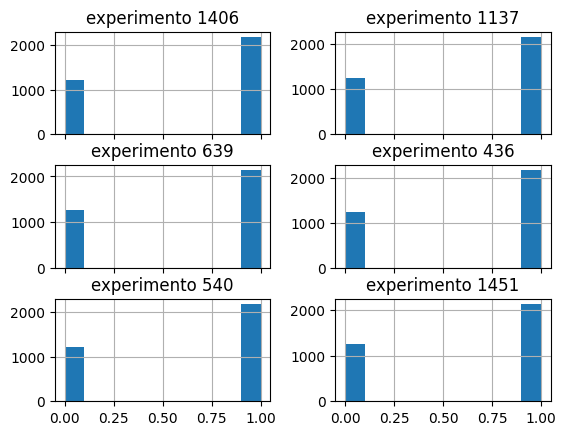

In [54]:
Buffon_df.sample(6, axis = 1).hist(sharex= True)
plt.show()

<h2>Distribución de la suma

In [55]:
suma = Buffon_df.sum()
suma

,0
experimento 1,2238
experimento 2,2178
experimento 3,2173
experimento 4,2162
experimento 5,2145
...,...
experimento 1996,2123
experimento 1997,2163
experimento 1998,2151
experimento 1999,2110


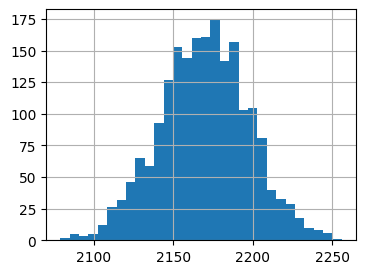

In [56]:
suma.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

In [57]:
medias = Buffon_df.mean()
medias

,0
experimento 1,0.656690
experimento 2,0.639085
experimento 3,0.637617
experimento 4,0.634390
experimento 5,0.629401
...,...
experimento 1996,0.622946
experimento 1997,0.634683
experimento 1998,0.631162
experimento 1999,0.619131


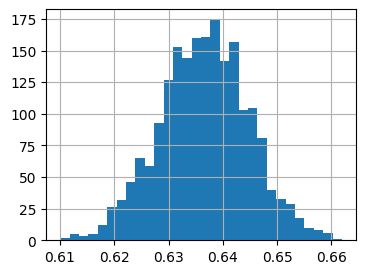

In [58]:
medias.hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

In [59]:
errores =  medias - (2/np.pi)
errores

,0
experimento 1,0.020070
experimento 2,0.002465
experimento 3,0.000998
experimento 4,-0.002230
experimento 5,-0.007218
...,...
experimento 1996,-0.013674
experimento 1997,-0.001937
experimento 1998,-0.005458
experimento 1999,-0.017488


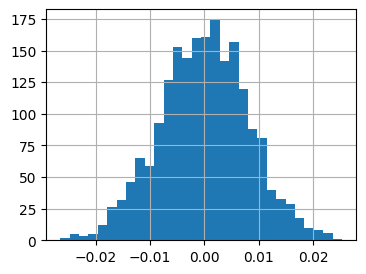

In [60]:
errores.hist(bins=30, figsize=(4,3))
plt.show()


Media de los Puntajes Z: -0.0042 (debería ser cercano a 0)
Desviación Estándar de los Puntajes Z: 0.9965 (debería ser cercano a 1)


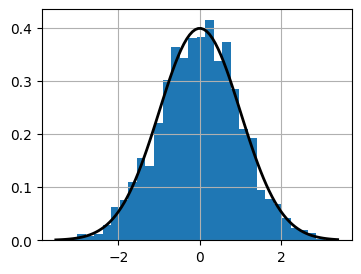

In [61]:
# podemos llegar a la distribución normal estándar
var = (2/np.pi)*(1-(2/np.pi))     # var = p(1-p)
sigma = np.sqrt(var)

z = (errores/(sigma/np.sqrt(n)))

z.hist(bins=30, figsize=(4,3), density=True)

media_z, std_z = z.mean(), z.std()

print(f"\nMedia de los Puntajes Z: {media_z:.4f} (debería ser cercano a 0)")
print(f"Desviación Estándar de los Puntajes Z: {std_z:.4f} (debería ser cercano a 1)")


# Distribucción gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.show()
plt.show()


# Distribución Bernoulli (obtener una vocal)

<h2> Preprocesar libro y obtener probabilidades de los caracteres

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
#Leer libro
libro = leer_libro('/content/drive/MyDrive/Datos/gabriel_garcia_marquez_cien_annos_soledad.txt')
borrar = ['Gabriel García Márquez',
          'Cien años de soledad',
          'EDITADO POR "EDICIONES LA CUEVA"',
          'Para J omi García Ascot y María Luisa Elio']

libro =  borrar_elementos(libro, borrar)
libro_limpio = limpiar_texto(libro)

In [77]:
#Cargar csv con distribución de probabilidad de letras
Ley_P_letras = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/ElementosEstadisticaMachineLearningPython/master/Semana4/Ley_Probabilidad_caracteres_100a%C3%B1os.csv')

# Calcular la probabilidad de obtener una vocal

filtro_vocal = Ley_P_letras['caracter'].isin(list('aeiou'))
p = Ley_P_letras.loc[filtro_vocal, 'probabilidad'].sum()
p

np.float64(0.38405272562528125)

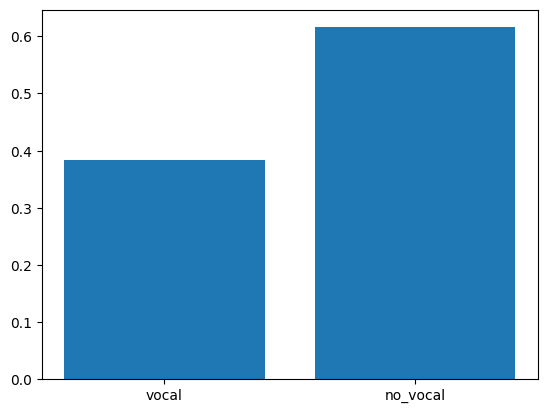

In [78]:
# Distribución bernoulli

plt.bar(['vocal','no_vocal'],[p, 1-p])
plt.show()

<h2> Obtener muestras

In [79]:
%%time
n = 400 # tamaño de la muestra
m = 100000 # número de muestras

muestras=pd.DataFrame()
muestras['texto'] = (genera_muestras_de_texto(libro_limpio, grado = 0,
                                              num_muestras = m, tam_muestra=n))
indice=pd.Series(['muestra_'+str(i) for i in range (1, m+1)])
muestras.index=indice
muestras['vocales'] = muestras['texto'].apply(cuenta_vocales)
muestras['p_estimada'] = muestras['vocales']/n
muestras['errores']= p - muestras['vocales']/n

CPU times: user 19.7 s, sys: 23.4 ms, total: 19.7 s
Wall time: 19.9 s


In [80]:
muestras.head()

,texto,vocales,p_estimada,errores
muestra_1,m sb cmunds ith eraoaasnoai x dcyhl nnl ctia...,146,0.3650,0.019053
muestra_2,d r ieae mrobeun vo anst nl aaoeae iuuiobrr l...,151,0.3775,0.006553
muestra_3,vaeaoousel u mr aldteu dsgpr aejlray adveah ...,156,0.3900,-0.005947
muestra_4,uup sada d ctyllae o uljneo oope eaauio rcrene...,177,0.4425,-0.058447
muestra_5,uloesteoi r orbauslodooloftnlnr eanqareoar...,155,0.3875,-0.003447


<h2> Distribución de la suma

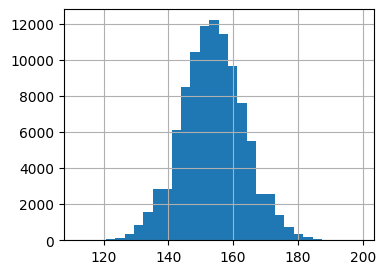

In [81]:
muestras['vocales'].hist(bins=30, figsize=(4,3))
plt.show()

<h2> Distribución de los promedios

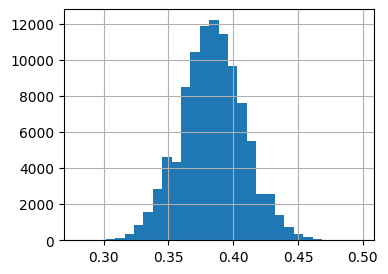

In [82]:
muestras['p_estimada'].hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los errores

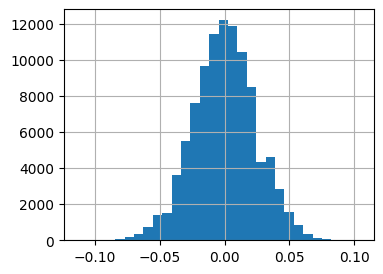

In [83]:
muestras['errores'].hist(bins=30, figsize=(4,3))
plt.show()


Media de los Puntajes Z: -0.0010 (debería ser cercano a 0)
Desviación Estándar de los Puntajes Z: 1.0018 (debería ser cercano a 1)


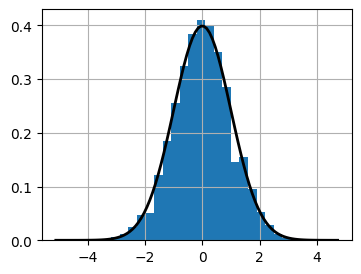

In [85]:
# podemos llegar a la distribución normal estandar
sigma = np.sqrt(p*(1-p))
z = muestras['errores']/(sigma/np.sqrt(n))

media_z, std_z = z.mean(), z.std()

print(f"\nMedia de los Puntajes Z: {media_z:.4f} (debería ser cercano a 0)")
print(f"Desviación Estándar de los Puntajes Z: {std_z:.4f} (debería ser cercano a 1)")

z.hist(bins=30, figsize=(4,3), density=True)

# Distribucción gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.show()
plt.show()



# Distribución exponencial (carácteres antes de que salga n)

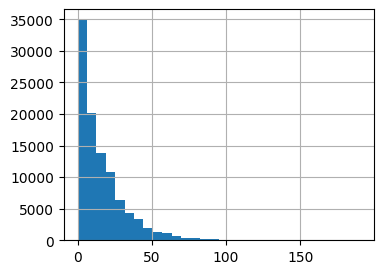

In [86]:
X = muestras['texto'].apply(cuenta_caracteres_antes_de_n)
X.hist(bins=30, figsize=(4,3))
plt.show()

In [87]:
X.mean()  #  1 / λ

np.float64(15.88239)

En la [distribución exponencial](https://en.wikipedia.org/wiki/Exponential_distribution)

$$ \mu = \cfrac{1}{\lambda}$$

$$ \sigma^2 = \cfrac{1}{\lambda^{2}}$$



In [88]:
sigma = X.mean()

**Ejemplos de fenómenos con distribución exponencial:**
- Valores máximos de precipitación diaria
- Compras efectuadas por visitantes en página web
- Tiempo para que se produzca un fallo


¿Qué otros??

<h2> Obtener muestras

In [89]:
n = 400 # tamaño de la muestra
m = 2000 # número de muestras
m_exp = {'muestra '+str(i):np.random.choice(X, n) for i in range(1, m+1)}

muestras_exp = pd.DataFrame.from_dict(m_exp)
muestras_exp

,muestra 1,muestra 2,muestra 3,muestra 4,muestra 5,muestra 6,muestra 7,muestra 8,muestra 9,muestra 10,...,muestra 1991,muestra 1992,muestra 1993,muestra 1994,muestra 1995,muestra 1996,muestra 1997,muestra 1998,muestra 1999,muestra 2000
0,67,12,13,9,8,4,20,19,4,3,...,1,53,36,33,20,2,9,12,4,23
1,5,10,35,4,15,7,25,5,16,10,...,1,40,103,16,8,18,9,25,4,5
2,5,86,16,18,2,37,25,4,14,17,...,8,18,9,4,11,2,3,4,12,11
3,0,30,41,19,15,1,34,4,8,14,...,9,14,24,2,46,20,6,2,5,24
4,10,7,26,12,14,0,12,6,11,2,...,32,4,5,11,22,17,2,16,32,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,6,26,5,7,4,35,14,2,41,14,...,8,8,0,0,12,13,17,4,21,39
396,6,29,12,18,28,19,0,5,8,1,...,49,25,27,9,40,18,3,8,25,7
397,21,13,7,7,26,10,82,16,37,1,...,9,78,11,5,30,25,1,0,22,50
398,1,0,55,4,7,4,28,23,21,7,...,9,12,2,8,51,3,3,7,12,47


<h2> Distribución de cada muestra

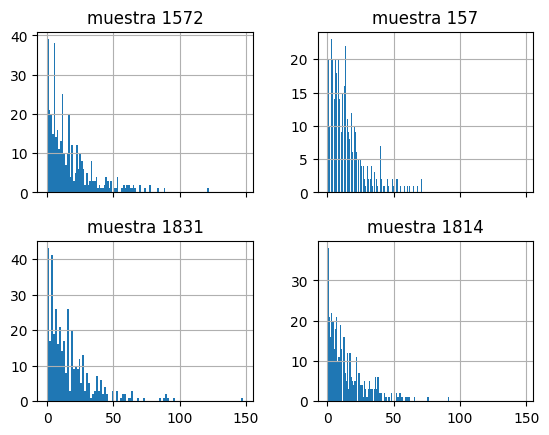

In [90]:
muestras_exp.sample(4, axis = 1).hist(sharex= True, bins=100)
plt.show()

<h2>Distribución de la suma

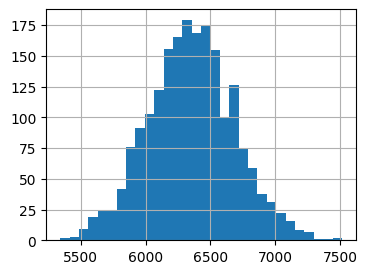

In [91]:
muestras_exp.sum().hist(bins=30, figsize=(4,3))
plt.show()

<h2>Distribución de los promedios

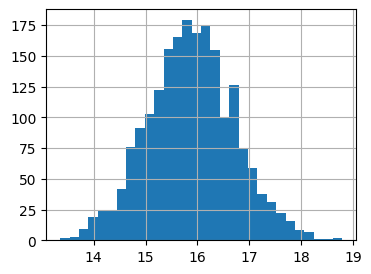

In [92]:
muestras_exp.mean().hist(bins=30, figsize=(4,3))
plt.show()


<h2>Distribución de los errores

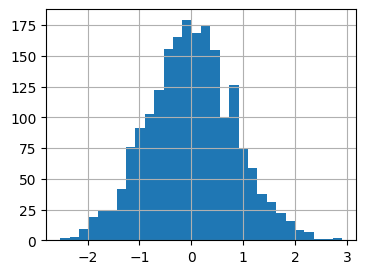

In [93]:
errores = muestras_exp.mean() - X.mean()
errores.hist(bins=30, figsize=(4,3))
plt.show()


Media de los Puntajes Z: -0.0021 (debería ser cercano a 0)
Desviación Estándar de los Puntajes Z: 1.0480 (debería ser cercano a 1)


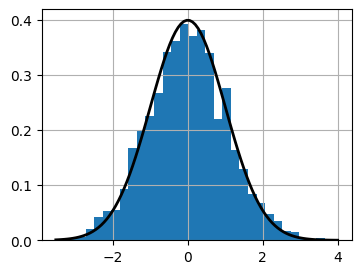

In [94]:
# podemos llegar a la distribución normal estándar
z = errores/(sigma/np.sqrt(n))

media_z, std_z = z.mean(), z.std()

print(f"\nMedia de los Puntajes Z: {media_z:.4f} (debería ser cercano a 0)")
print(f"Desviación Estándar de los Puntajes Z: {std_z:.4f} (debería ser cercano a 1)")

z.hist(bins=30, figsize=(4,3), density=True)

# Distribucción gaussiana
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
plt.plot(x, p, 'k', linewidth=2)
plt.show()
plt.show()




https://seeing-theory.brown.edu/probability-distributions/index.html

